## Projeto 1: Análise de Dados - TITANIC
----

### Vamos utilizar o dataset sobre o desastre do Titanic

Vamos utilizar um dataset muito famoso, disponível como Competição Initerrupta no Kaggle: **"Titanic - Machine Learning from Disaster"** (fonte: https://www.kaggle.com/competitions/titanic )

Muito livros e o próprio site do Kaggle, utiliza esse caso como o de entrada no mundo da aprendizagem de máquina, todavia, nós vamos modificá-lo um pouco e vamos trabalhar a ANÁLISE DE DADOS.

### O Desafio
O naufrágio do Titanic é um dos naufrágios mais infames da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o RMS Titanic, considerado amplamente "inafundável", afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora houvesse um elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros.

### Problema de Negócio:  
**"Como as características demográficas e socioeconômicas dos passageiros influenciaram suas taxas de sobrevivência no desastre do Titanic?"**

Esta pergunta visa entender os padrões nos dados que podem revelar insights sobre a segurança, preparação para emergências e medidas que poderiam ser consideradas em situações futuras para melhorar as taxas de sobrevivência em desastres semelhantes.

O dataset está disponível em:  
url = 'https://www.kaggle.com/c/titanic/download/train.csv'

-----

### Descrição do Conjunto de Dados do Titanic

**Descrição:**
O conjunto de dados do Titanic é um conjunto de dados clássico usado no campo da ciência de dados e aprendizado de máquina. Ele contém informações sobre os passageiros a bordo do RMS Titanic, que afundou após colidir com um iceberg em sua viagem inaugural em abril de 1912. O conjunto de dados é comumente usado para tarefas de modelagem preditiva, como prever a sobrevivência dos passageiros com base em várias características.

**Características:**
- PassengerId: Identificador único para cada passageiro.
- Survived: Indica se o passageiro sobreviveu (1) ou não (0).
- Pclass: Classe do bilhete (1ª, 2ª ou 3ª classe).
- Name: Nome do passageiro.
- Sex: Gênero do passageiro (masculino ou feminino).
- Age: Idade do passageiro em anos.
- SibSp: Número de irmãos/cônjuges a bordo do Titanic.
- Parch: Número de pais/filhos a bordo do Titanic.
- Ticket: Número do bilhete.
- Fare: Tarifa do passageiro.
- Cabin: Número da cabine.
- Embarked: Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).

### Solução: Análise Detalhada no Google Colab

A solução envolverá várias etapas de análise de dados, cada uma focada em aspectos específicos dos dados para responder à pergunta definida.

### Etapa 1: Carregamento e Preparação dos Dados

In [12]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregando o dataset
url = '/content/train.csv'
data = pd.read_csv(url)

FileNotFoundError: [Errno 2] No such file or directory: '/content/train.csv'

In [3]:
# Visualização inicial dos dados
data.head()

NameError: name 'data' is not defined

In [ ]:
# Verificando valores faltantes
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Essa é a forma de visualização dos dados ausentes que estamos fazendo até agora. Podemos também, utilizando os recursos do Seaborn, mostrar um mapa de calor invertido, mostrando a ausência de valores com uma tonalidade mais clara...

In [4]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

NameError: name 'data' is not defined

In [ ]:
# Tratamento de dados Faltantes (idade)
# Calcular a mediana da idade
age_median = data['Age'].median()
# Atribuir a mediana diretamente ao DataFrame
data['Age'] = data['Age'].fillna(age_median)

# Tratamento de dados faltantes (cabine)
data.drop(columns=['Cabin'], inplace=True)  # Cabine tem muitos dados faltantes

In [5]:
# Verificando valores faltantes
data.isnull().sum()

NameError: name 'data' is not defined

Por fim, faltam esses dois passageiros que não possuem onde foram embarcados...  Vamos simplesmente deletar esses registros.

In [6]:
data.dropna(inplace=True)

NameError: name 'data' is not defined

In [7]:
# Verificando valores faltantes
data.isnull().sum()

NameError: name 'data' is not defined

Visualmente, ...

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

NameError: name 'data' is not defined

### Etapa 2: Análise Exploratória de Dados (EDA)


In [9]:
# Estatísticas descritivas
data.describe()

NameError: name 'data' is not defined

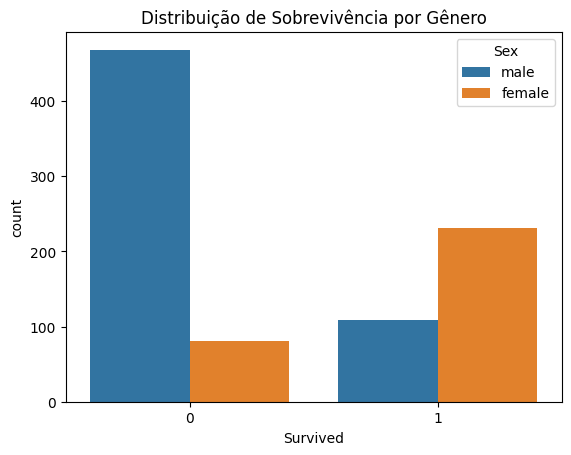

In [ ]:
# Distribuição de sobreviventes por gênero
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Distribuição de Sobrevivência por Gênero')
plt.show()

In [10]:
# Distribuição de sobreviventes por classe de passageiro
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('Distribuição de Sobrevivência por Classe')
plt.show()

NameError: name 'data' is not defined

### Etapa 3: Análise Mais Profunda

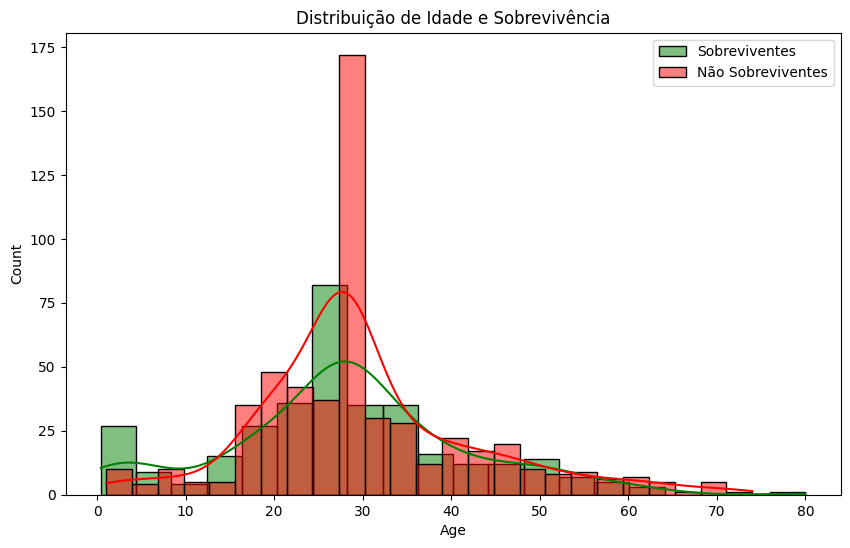

In [ ]:
# Análise da idade dos passageiros e sua relação com a sobrevivência
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Survived'] == 1]['Age'], color='green', kde=True, label='Sobreviventes')
sns.histplot(data[data['Survived'] == 0]['Age'], color='red', kde=True, label='Não Sobreviventes')
plt.title('Distribuição de Idade e Sobrevivência')
plt.legend()
plt.show()

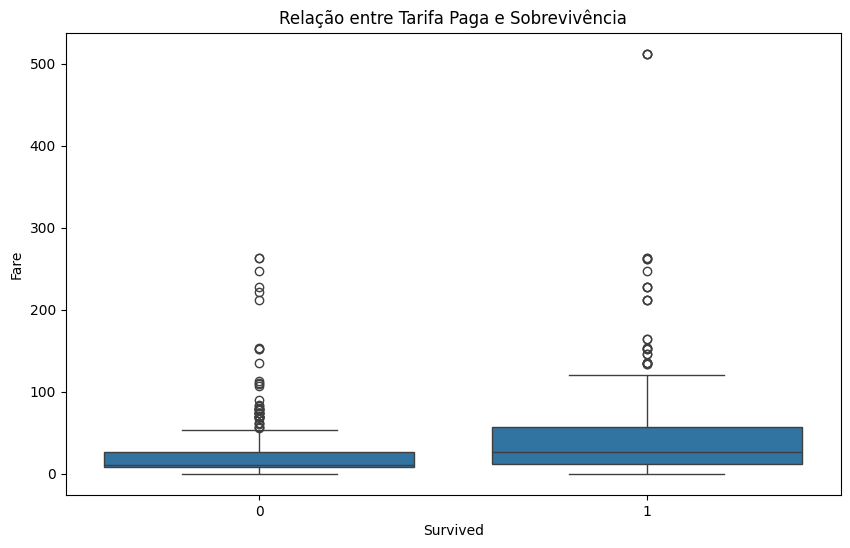

In [ ]:
# Análise da tarifa paga e sobrevivência
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Relação entre Tarifa Paga e Sobrevivência')
plt.show()

### Etapa 4: Correlações e Análises dos Dados

In [15]:
# Matriz de correlação
correlation = data.select_dtypes(include=np.number).corr() # Only include numeric columns for correlation analysis
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

NameError: name 'data' is not defined

### Discussão sobre as Descobertas
1. **Impacto do Gênero na Sobrevivência**   A análise inicial revela uma distinção clara nas taxas de sobrevivência entre homens e mulheres. Os gráficos indicam que uma proporção significativamente maior de mulheres sobreviveu em comparação com os homens. *Isso pode ser atribuído a políticas de evacuação prioritária como "mulheres e crianças primeiro", que eram comuns em desastres náuticos naquela época.*

2. **Classe como Fator de Sobrevivência** Os dados mostram que os passageiros da primeira classe tiveram uma taxa de sobrevivência significativamente maior em comparação com as outras classes. *Isso sugere que fatores socioeconômicos, como a localização das cabines e o acesso a botes salva-vidas, desempenharam um papel crucial na sobrevivência dos passageiros.*

3. **Relação entre Idade e Sobrevivência** A distribuição de idade dos sobreviventes versus não sobreviventes indica que crianças e idosos foram mais propensos a sobreviver. *Este padrão também apoia a ideia de priorização de mulheres e crianças durante os procedimentos de evacuação e pode indicar uma tendência de proteção aos mais vulneráveis em situações de emergência.*

4. **Influência da Tarifa na Sobrevivência** A análise das tarifas pagas mostra que passageiros que pagaram tarifas mais altas, geralmente relacionadas a cabines de classe superior, tiveram melhores chances de sobrevivência. *Isso pode estar correlacionado com a proximidade dessas cabines aos botes salva-vidas e com o melhor atendimento durante a emergência.*

5. **Correlações Gerais** A matriz de correlação ajudou a confirmar algumas dessas observações, mostrando correlações positivas entre a sobrevivência e fatores como tarifa paga e classe do passageiro. Por outro lado, a idade parece ter uma correlação menos direta, indicando que outros fatores interpessoais e de decisão durante o desastre podem ter influenciado os resultados de sobrevivência.

### Conclusões
Os insights obtidos com este projeto de análise de dados não apenas ajudam a entender melhor o trágico evento do Titanic, mas também oferecem lições valiosas sobre a gestão de emergências e o design de medidas de segurança em transportes. As descobertas podem ser utilizadas para melhorar as práticas atuais em segurança de transportes, garantindo que medidas de proteção sejam justas e eficazes para todos os passageiros, independentemente de gênero, idade ou status socioeconômico.

### FIM